# Credit Fraud Prediction

### Problem Statement 
At least 492 occurences of credit fraudulent transactions happen in September 2013. With the total amount of money loss 60k dollar/euro would caused many people suffers. Build a machine learning model that could help people by minimize credit fraudulent transactions. 

### About the Data
- Data source :  [Credit Card Fraud Detection | Kaggle](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud?datasetId=310&sortBy=voteCount)
- The dataset contains transaction made by credit card in September 2013 by European cardholders
- The data contains confidential issues that made formatted in standardized numbers. Except amount, time and target features 


### About the Features
- Time : Number of seconds elapsed between this transaction and the first transaction in the dataset
- Amount : Transaction amount
- Class : 1 for fraudulent transactions, 0 otherwise

In [2]:
import pandas as pd
import numpy as np 
from numpy import percentile
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings

warnings.filterwarnings('ignore')

%matplotlib inline 

In [3]:
df = pd.read_csv(r'/kaggle/input/creditcardfraud/creditcard.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
amount = df.groupby('Class')['Amount'].sum()
fraud, unfraud = len(df[df['Class'] == 1]), len(df[df['Class'] == 0])
fraud_perc, unfraud_perc = (fraud/len(df)) * 100 , (unfraud/len(df))*100

Loss = pd.DataFrame({'Fraud' : ['Fraud', 'No Fraud'], 'Total Amount' : [amount[1], amount[0]], 'Freq.' : [fraud, unfraud],
                     '% Perc.' : [fraud_perc, unfraud_perc]})
Loss = Loss.set_index('Fraud')
Loss

,Total Amount,Freq.,% Perc.
Fraud,,,
Fraud,60127.97,492,0.172749
No Fraud,25102462.04,284315,99.827251


### Data Exploration 

In [5]:
# Initialize lists to store categorical and numerical features 
catfeat = [] 
numfeat = [] 

# Loop over the columns in the DataFrame 
for i in df.columns: 
# Check the data type of the column 
	if(df[i].dtypes == 'object'): 
  	# Append column name to list of categorical features 
		catfeat.append(i) 
	else: 
	  # Append column name to list of numerical features 
	  numfeat.append(i) 
  	# Print the number of categorical and numerical features 
print(f'The Number of Object Features : {len(catfeat)}') 
print(f'The Number of Numerical Features : {len(numfeat)}')

The Number of Object Features : 0
The Number of Numerical Features : 31


In [6]:
print(f'Number of Missing Values : {df.isnull().sum().sum()}')

Number of Missing Values : 0


In [7]:
namedfeat = ['Time', 'Amount']
for i in df[namedfeat]:
  if (df[i].duplicated().sum() > 0):
    print(f'{i} Number of Duplicated : {df[i].duplicated().sum()}')

Time Number of Duplicated : 160215
Amount Number of Duplicated : 252040


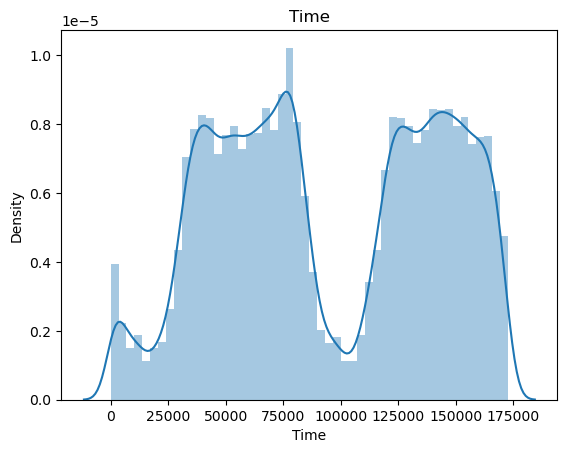

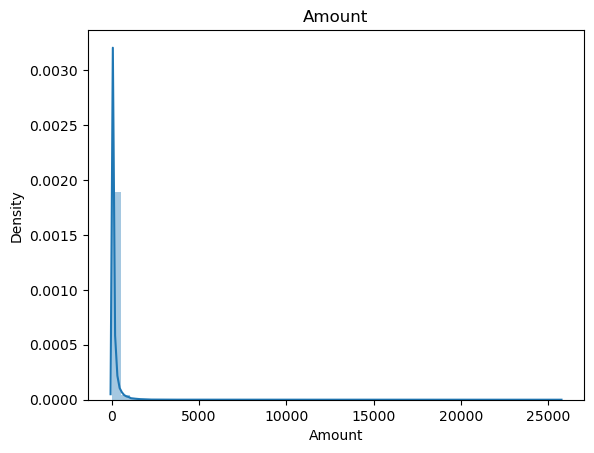

In [8]:
for i in df[namedfeat]:
  plt.title(i)
  sns.distplot(df[i])
  plt.show()

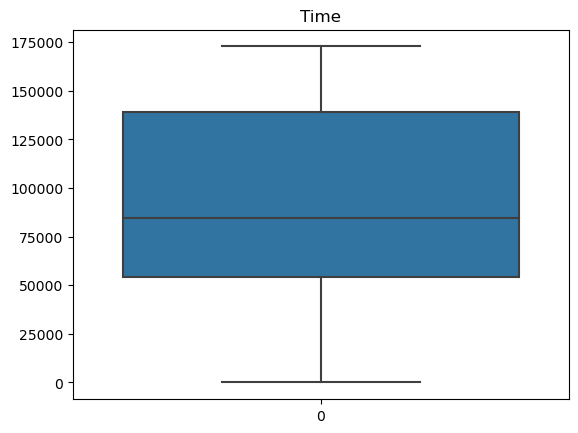

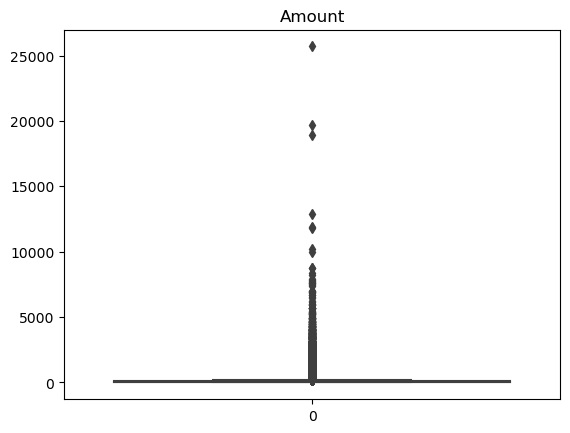

In [9]:
for i in df[namedfeat]:
  plt.title(i)
  sns.boxplot(df[i])
  plt.show()

In [10]:
df[namedfeat].describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,94813.859575,47488.145955,0.0,54201.5,84692.0,139320.500,172792.00
Amount,284807.0,88.349619,250.120109,0.0,5.6,22.0,77.165,25691.16


### Data Cleaning 

- We have a big outliers problem of the datasets. This will be a consideration for the next project since a majority of data in amount feature was outliers. So we need to be careful on how to treat them
- Besides outliers, we don't have other problems that we should worries 

### Exploratory Data Analysis

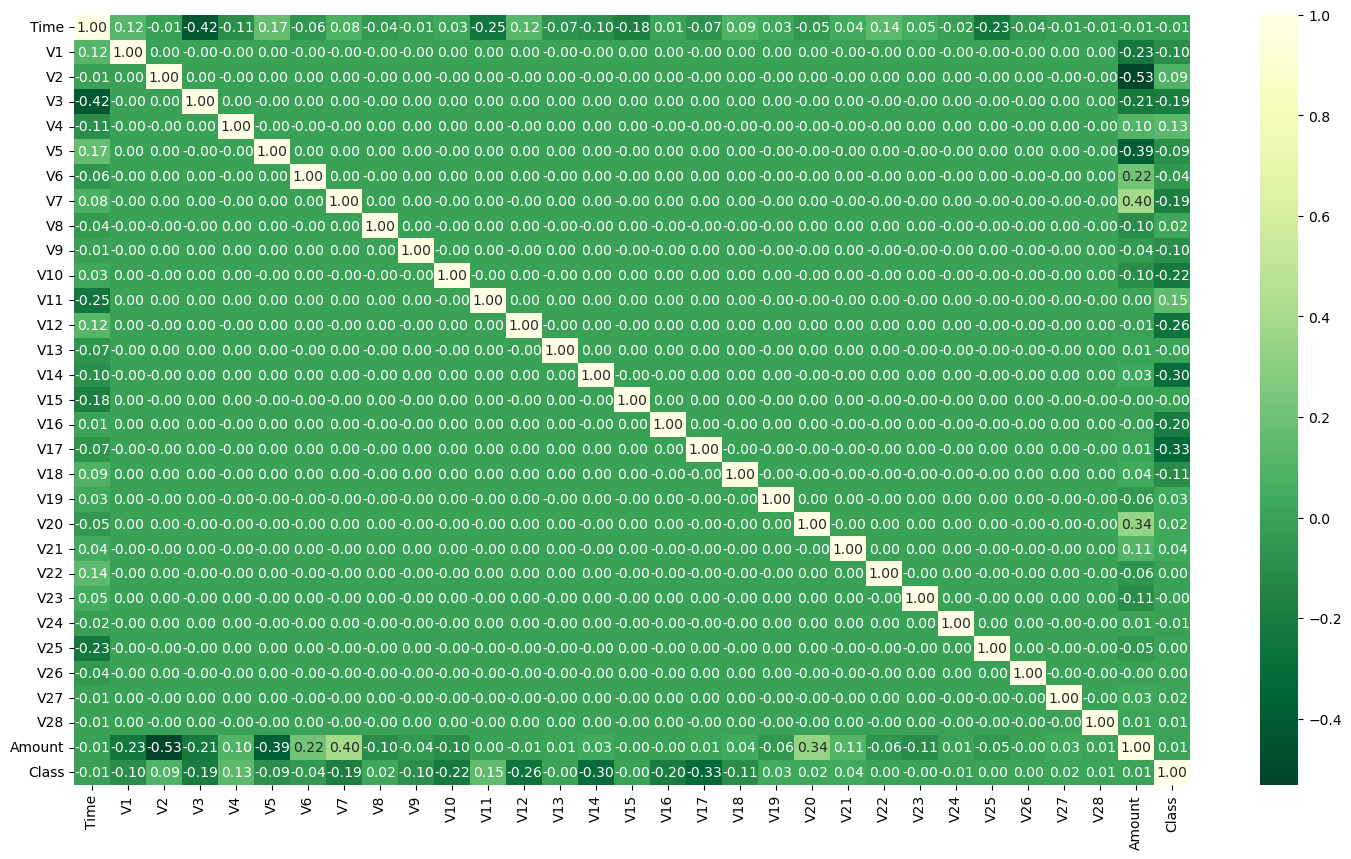

In [11]:
# check the correlation
fig = plt.figure(figsize= (18, 10))
sns.heatmap(df.corr(), cmap='YlGn_r', annot = True, fmt = ".2f")
plt.show()

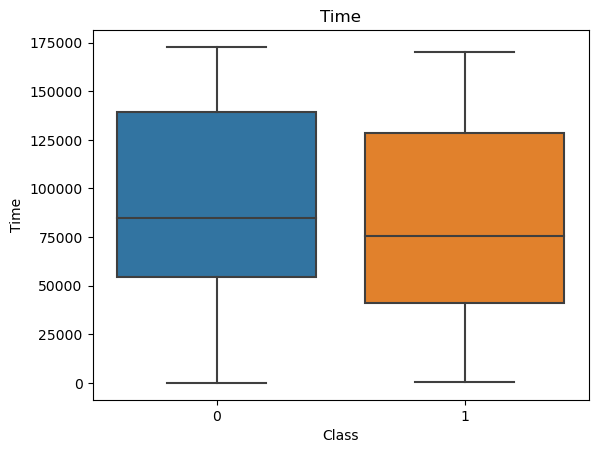

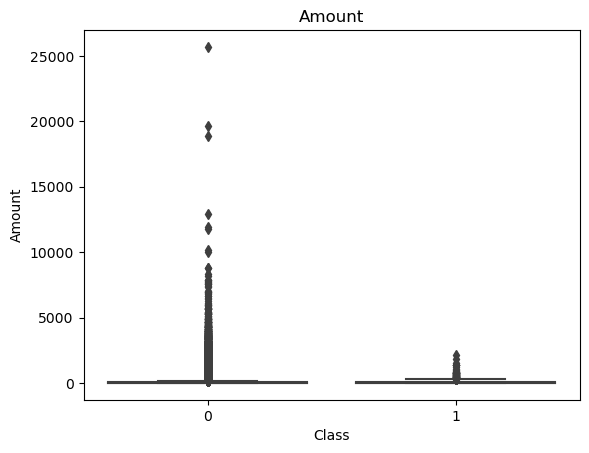

In [12]:
for i in df[namedfeat]:
  plt.title(i)
  sns.boxplot(data = df, x = 'Class', y = i)
  plt.show()

### Data Preprocessing

In [13]:
# splitting the dataset 
X = df.drop('Class', axis=1)
y = df['Class']

In [14]:
from sklearn.model_selection import train_test_split
# train test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y)

In [15]:
from sklearn.preprocessing import StandardScaler

X_train[namedfeat] = StandardScaler().fit_transform(X_train[namedfeat])
X_test[namedfeat] = StandardScaler().fit_transform(X_test[namedfeat])

In [16]:
from imblearn.over_sampling import SMOTE

X_train, y_train = SMOTE().fit_resample(X_train, y_train)
X_test, y_test = SMOTE().fit_resample(X_test, y_test)

### Model Training

In this project we will use 3 machine learning model as a comparison. That 3 model is :
1. Xgboost
2. GradientBoost
3. RandomForest
4. LogisticRegression
5. SVM 

In [17]:
# build LogisticRegression
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC 
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42).fit(X_train, y_train)
lr = LogisticRegression(random_state = 42).fit(X_train, y_train)
svc = SVC(random_state=42).fit(X_train, y_train)

In [18]:
from sklearn.metrics import recall_score, precision_score, f1_score 

models = [rf, lr, svc]
for model in models:
    y_pred = model.predict(X_test)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print(model)
    print(recall)
    print(precision)
    print(f1)

RandomForestClassifier(random_state=42)
0.8346757175014069
0.9998736017190166
0.9098367726414462
LogisticRegression(random_state=42)
0.9374296567248172
0.9727017262143718
0.9547400282986764
SVC(random_state=42)
0.9035769555430501
0.9833684210526316
0.9417856553696135


**Results** : 
Based on cross-validation scorce, we get  best performel model was Logistic Regression


### Hyperparameter Optimization

For the sake of simplicity, i will not much tuning the parameter 

In [ ]:
y_pred = svc.predict(X_test)

In [20]:
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

for C in [0.01, 0.1, 1, 10]:
    for penalty in ['l1', 'l2']:
        print('C:', C, 'Penalty : ', penalty)
        lr = LogisticRegression(C = C, penalty = penalty, solver = 'saga',random_state = 42).fit(X_train, y_train)
        y_pred = lr.predict(X_test)
        recall = recall_score(y_test, y_pred)
        precis = precision_score(y_test, y_pred)
        print(f'Recall Score :{round(recall, 3)}')
        print(f'Precision Score : {round(precis, 3)}')

C: 0.01 Penalty :  l1
Recall Score :0.937
Precision Score : 0.973
C: 0.01 Penalty :  l2
Recall Score :0.937
Precision Score : 0.973
C: 0.1 Penalty :  l1
Recall Score :0.937
Precision Score : 0.973
C: 0.1 Penalty :  l2
Recall Score :0.937
Precision Score : 0.973
C: 1 Penalty :  l1
Recall Score :0.937
Precision Score : 0.973
C: 1 Penalty :  l2
Recall Score :0.937
Precision Score : 0.973
C: 10 Penalty :  l1
Recall Score :0.937
Precision Score : 0.973
C: 10 Penalty :  l2
Recall Score :0.937
Precision Score : 0.973


- It seems there is no significance difference between all parameter variations. 
- Then we could pick parameter setting randomly because it will give the same results 

In [21]:
model = LogisticRegression(C = 0.01, penalty = 'l1', solver = 'saga', random_state = 42).fit(X_train, y_train)

### Model Evaluation 

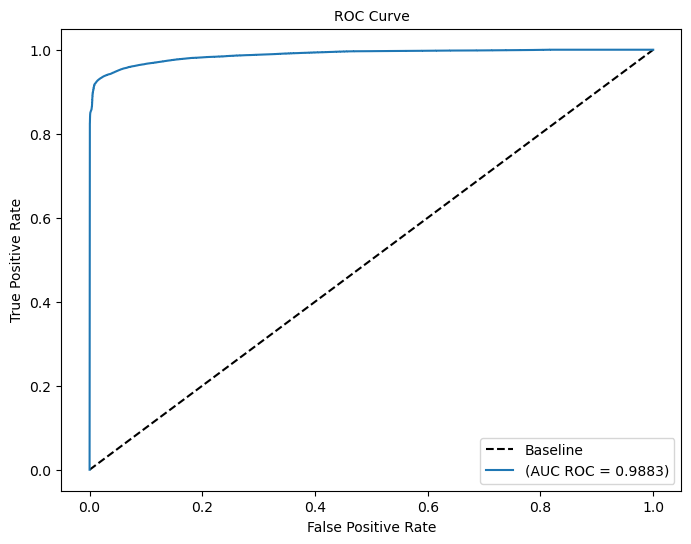

In [25]:
from sklearn.metrics import roc_curve, roc_auc_score
# create a plot 
ax, fig = plt.subplots(figsize=(8,6)) 

# create a baseline 
plt.plot([0,1], [0,1], linestyle='--', label='Baseline', color = 'black') 

y_probs = model.predict_proba(X_test) 
y_probs = y_probs[:, 1] 

fpr, tpr, _ = roc_curve(y_test, y_probs) 
auc = round(roc_auc_score(y_test, y_probs), 4) 

plt.plot(fpr, tpr, label = (f'(AUC ROC = {auc:.4f})')) 
plt.legend(loc='best') 

# set plot axises 
plt.ylabel('True Positive Rate', size = 10) 
plt.xlabel('False Positive Rate', size = 10) 
plt.title('ROC Curve', size=10) 
plt.legend() 

# show the plot 
plt.show()

- We get quite a promising results with AUC ROC score reachs 0.9539
- I will trying to make sure this results in the future

### Gathering Conclusions 
- We successfully created a prediction model that carefullye processed to prevent data leakage
- Best model performer for this dataset was Logistic Regression with hyperparameter optimization could reach AUC ROC = 0.9883

### Further Improvement
There will be some improvement effort for this notebook in the future. Some of them :
1. Adding Visualization for model performance comparison and hyperparameter optimization
2. Adding comment for more context & Interpretation
3. Create code neater 
4. Other Further coming soon 